## PSET 1 - Q7: Kernel Regression


In [2]:
import numpy as np
import pyarrow

Plot the conditional expectation:



In [39]:
import pandas as pd
from scipy.stats import distributions as iid

df = pd.read_parquet('x_and_n.parquet', engine='pyarrow')
df = df.dropna()

y = df.iloc[:,0]
x = df.iloc[:,1]
V = range(x.min(axis=None)+1,x.max(axis=None)+1) # Range to plot over

np.shape(x)

(101660,)

Now let&rsquo;s take an informal look at the data:



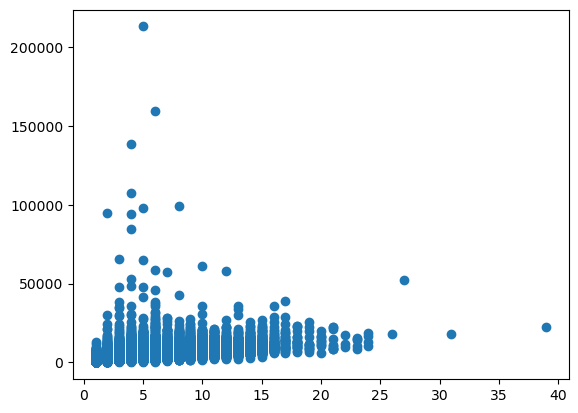

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

### Estimator



Let&rsquo;s go ahead and define the kernel regression estimator, following
the same general logic as in our exploration of kernel densities.

Start by defining a kernel:



In [30]:
sqrt3 = np.sqrt(3)  # Avoid repeated evaluation of this for speed...

#k = lambda u: (np.abs(u) < sqrt3)/(2*sqrt3)  # Rectangular kernel

k = lambda u: np.exp(-(u**2)/2)/np.sqrt(2*np.pi) # Gaussian kernel

Now define the kernel estimator:



In [12]:
def kernel_regression(X,y,h):
    """
    Use data (X,y) to estimate E(y|x), using bandwidth h.
    """
    def mhat(x):
        S = k((X-x)/h) # "Smooths"

        return S.dot(y)/S.sum()

    return mhat

We already have a random sample: let&rsquo;s try using it to estimate $m$:



4076.77244149893


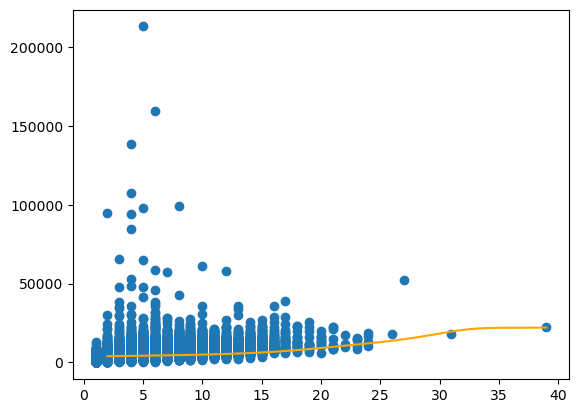

In [19]:
h=4
mhat = kernel_regression(x,y,h) 
print(mhat(3))  # Try to evaluate at a point

fig,ax = plt.subplots()

plt.scatter(x,y)  # "Truth"
ax.plot(V,[mhat(v) for v in V],c="orange") # Estimate

3716.776862909348


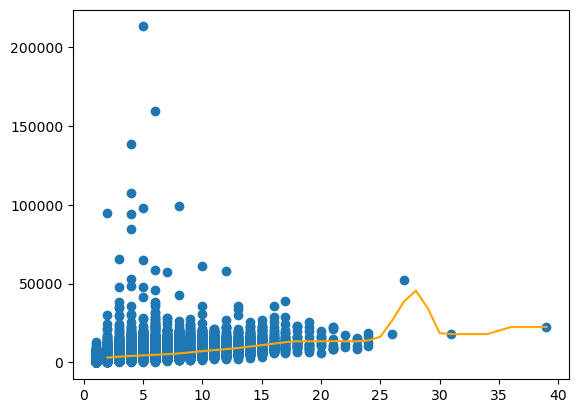

In [20]:
h=1
mhat = kernel_regression(x,y,h) 
print(mhat(3))  # Try to evaluate at a point

fig,ax = plt.subplots()

plt.scatter(x,y)  # "Truth"
ax.plot(V,[mhat(v) for v in V],c="orange") # Estimate

4262.182324749851


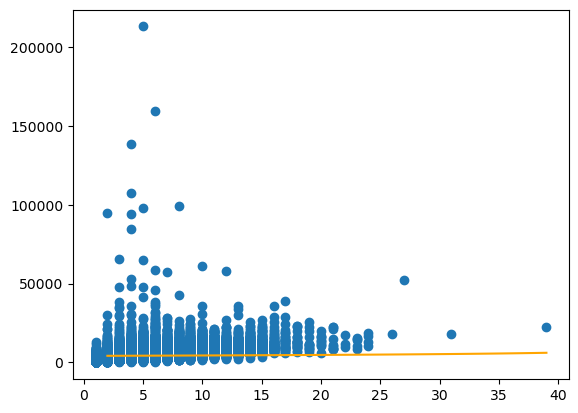

In [23]:
h=4
mhat = kernel_regression(x,y,h) 
print(mhat(3))  # Try to evaluate at a point

fig,ax = plt.subplots()

plt.scatter(x,y)  # "Truth"
ax.plot(V,[mhat(v) for v in V],c="orange") # Estimate

## 7.2

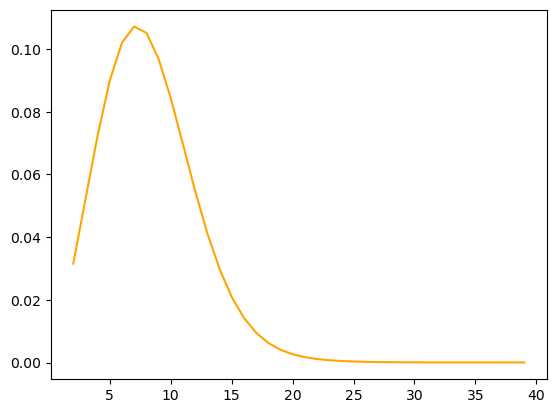

In [54]:
def kernel_regression_f(X,y,h):
    """
    Use data (X,y) to estimate Empirical pdf of E(y|x), using bandwidth h.
    """
    def fhat(x):
        S = k((X-x)/h) # "Smooths"

        return S.mean()/h

    return fhat

h=4
fhat = kernel_regression_f(x,y,h)

fig,ax = plt.subplots()

ax.plot(V,[v*fhat(v) for v in V]/sum([v*fhat(v) for v in V]),c="orange") # Estimate


## 7.3

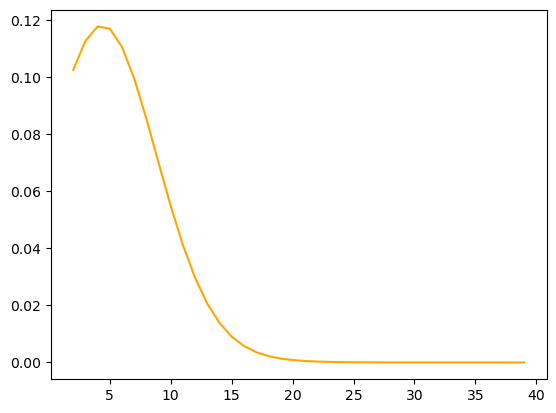

In [53]:
h=4
fhat = kernel_regression_f(x,np.log(y),h)

fig,ax = plt.subplots()

ax.plot(V,[fhat(v) for v in V]/sum([fhat(v) for v in V]),c="orange") # Estimate